<a href="https://colab.research.google.com/github/SU-sumico/edsj/blob/main/5_random_forest_regression_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://funatsu-lab.github.io/open-course-ware/machine-learning/random-forest/#howitworks

#####予測モデルの訓練の流れ
1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
#####Flow of training a predictive model
1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model 
4. specify a loss function
5. train the model using the training data and the loss function 
6. evaluate the model using the test data

######目的
* **ランダムフォレスト回帰**による住宅価格予測モデルを実装します。
---
######Objective
* Implement a housing price predictive model using **Random Forest Regression**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ライブラリのインポート/Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# データセットの読み込み/Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5data/housing.csv', header=None, sep='\s+')
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df.iloc[:, 0:13]
y = df['MEDV'].values

# 1. 訓練データとテストデータに分割/Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of X_train：',X_train.shape,'Shape of y_train：',y_train.shape,'Shape of X_test：',X_test.shape,'Shape of y_test：',y_test.shape)

Shape of X_train： (404, 13) Shape of y_train： (404,) Shape of X_test： (102, 13) Shape of y_test： (102,)


* RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# 3. 予測モデルの指定 4. 損失関数の指定 5. 訓練データと損失関数を用いたモデルの訓練
# 3. specify specify the predictive model 4. specify the loss function 5. train the model using the training data and the loss function
# ランダムフォレスト回帰のモデルを作成/Create a model for random forest regression
model = RandomForestRegressor(bootstrap=True, n_estimators=1000, criterion='squared_error', max_depth=None, random_state=0, n_jobs=-1)

# モデルの訓練/Train the model
# 学習するには、生成したmodelインスタンスからfit()メソッドを呼ぶ
# To learn, call the fit() method from the generated model instance

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [ ]:
# 6. テストデータを用いたモデルの評価/Evaluate the model using test data
# 訓練データ、テストデータの住宅価格を予測/Predict housing prices on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 正解の住宅価格と予測の住宅価格のMSEを計算/Calculate the MSE of the correct and predicted housing prices
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 1.38, test: 18.84


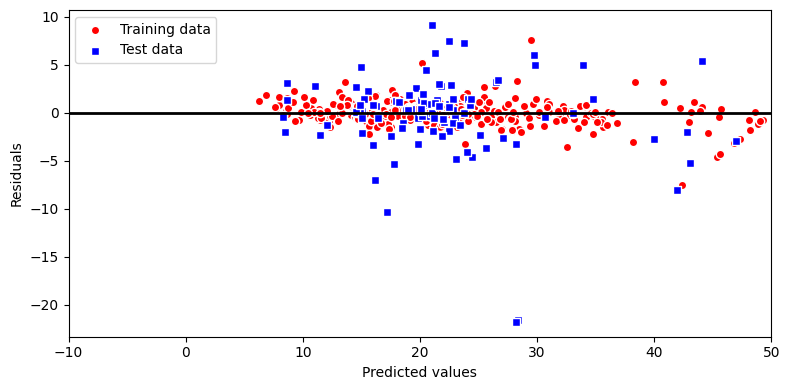

In [ ]:
# 残差プロット/residual plot
plt.figure(figsize=(8,4)) #プロットのサイズ指定/Specify plot size

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [ ]:
# 説明変数の重要度を表示/Display the importance of explanatory variables
model.feature_importances_

array([0.04127976, 0.00123856, 0.0075613 , 0.00087938, 0.02053643,
       0.40584637, 0.01357617, 0.03910201, 0.00384994, 0.0157941 ,
       0.0222856 , 0.00957269, 0.41847769])

* feature_importances_: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* feature_importances_ とは、特徴量の重要度を出力するメソッドです。
* feature_importances_ is a method that outputs the importance of features.

* np.argsort: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

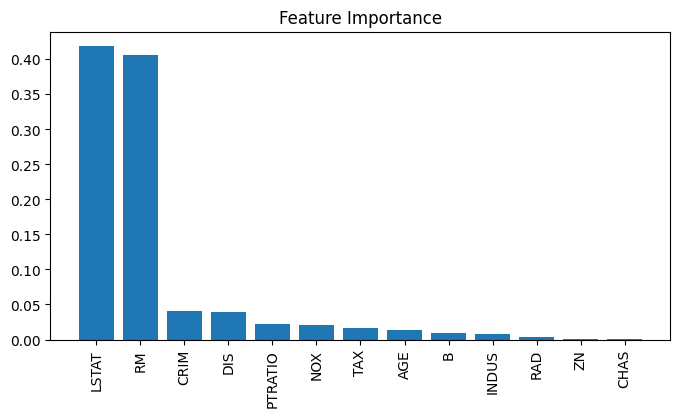

In [ ]:
# 説明変数の重要性を計算/Calculate the importance of explanatory variables
importances = model.feature_importances_

# 説明変数の重要性を降順にソート/Sort the importance of explanatory variables in descending order
indices = np.argsort(importances)[::-1]

# 説明変数の名前を、ソートした順に並び替え/Sort names of explanatory variables in sorted order
names = [df.columns[i] for i in indices]

# プロットの作成/Create a plot
plt.figure(figsize=(8,4)) #プロットのサイズ指定/Specify plot size
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()